In [9]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.mlab as mlab
from scipy.stats import beta
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function


In [64]:
x = np.linspace(-1, 1, 201)
w0 = -1.3
w1 = 0.5
e = np.random.normal(0, 0.3, 201)
y = (w0 * x) + w1 + e\ 

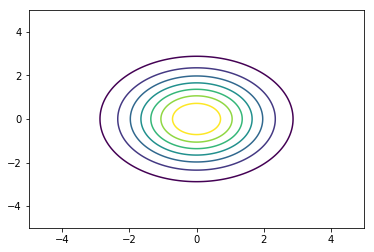

In [65]:
mu = np.array([0,0])
variance = np.array([[2,0],[0,2]])
f = multivariate_normal(mu, variance)

a, b = np.mgrid[-5:5:.01, -5:5:.01]

pos = np.empty(a.shape + (2,))
pos[:, :, 0] = a; pos[:, :, 1] = b
plt.contour(a, b, f.pdf(pos))




[[-0.99  1.  ]]
[[1.07976151 0.92953382]
 [0.92953382 1.06107694]]
[[-0.57240895 -0.57240895]
 [ 0.57819086  0.57819086]]


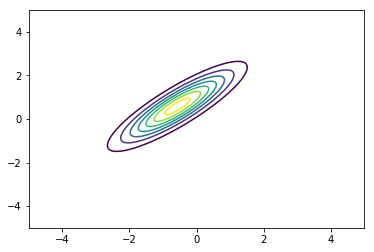

In [57]:
def inv(x):
    return np.linalg.inv(x)




def getBeta(var, number):
    return np.matrix(inv(var * np.identity(number)))

def getPhi(index):
    return np.matrix(np.column_stack((x[index], np.ones(1))))

def getVariance(variance, phi):
    return inv(inv(variance) + beta * phi.transpose() * phi)

def getMean(newVariance, variance, mean, phi, t):
    return newVariance * (inv(variance) * mean + beta * phi.transpose()  * t)

beta = getBeta(0.3, 2)

    
phi = getPhi(1)
print(phi)

t = y[0]

# newVariance = inv(inv(variance) + np.dot(np.dot(beta, phi.transpose()), phi))
# mean = np.dot(newVariance, (np.dot(inv(variance),mu) + np.dot(beta, phi.transpose()) * t))

newVariance = getVariance(variance, phi)
mean = getMean(newVariance, variance, mu, phi, t)

print(newVariance)
print(mean)

newMean = np.array([mean[0, 0], mean[1,0]])

f2 = multivariate_normal(newMean, newVariance)

plt.contour(a, b, f2.pdf(pos))
# what is this

[[ 0.10781671  1.12344567]
 [-1.50168889 -0.41675964]
 [ 1.87057179  2.65327068]
 [-0.79632234  0.86828016]
 [-0.97091425  0.37535085]]
[ 0.10781671 -1.50168889  1.87057179 -0.79632234 -0.97091425]
[ 1.12344567 -0.41675964  2.65327068  0.86828016  0.37535085]


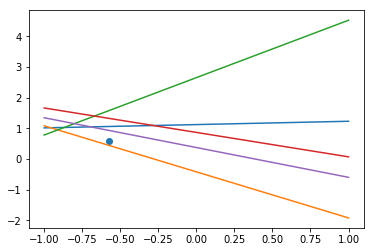

In [58]:
w = np.random.multivariate_normal(newMean, newVariance, 5)
print(w)
w0 = w[:,0]
w1 = w[:,1]

print(w0)
print(w1)

def line_fit(a, b, x):
    y = a * x + b
    return y


fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(newMean[0], newMean[1])

for i in range(0, w0.size):
    y_line = np.array([])
    for j in range(0, x.size):
        y_line = np.append(y_line, line_fit(w0[i], w1[i], x[j]))
    ax1.plot(x, y_line)


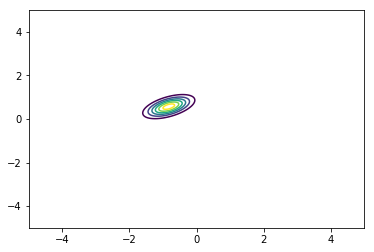

In [60]:

for i in range(1,200, 50):
    preVar = newVariance
    preMean = mean
    phi = getPhi(i)
    t = y[i]
    newVariance = getVariance(preVar, phi)
    mean = getMean(newVariance, preVar,preMean, phi, t)

        


# print(variance2)
# print(mean2)

newMean = np.array([mean[0, 0], mean[1, 0]])


f3 = multivariate_normal(newMean, newVariance)

plt.contour(a, b, f3.pdf(pos))

[[-1.00352298  0.51515803]
 [-1.67193596 -0.0254461 ]
 [-0.87205179  0.60843674]
 [-0.35683818  1.14914276]
 [-0.74134208  0.65688385]]


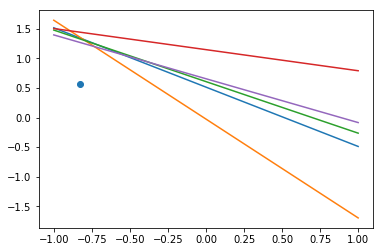

In [62]:
w = np.random.multivariate_normal(newMean, newVariance, 5)
print(w)
w0 = w[:,0]
w1 = w[:,1]

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(newMean[0], newMean[1])

for i in range(0, w0.size):
    y_line = np.array([])
    for j in range(0, x.size):
        y_line = np.append(y_line, line_fit(w0[i], w1[i], x[j]))
    ax2.plot(x, y_line)
